In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Here I am trying to match the names of our data to be the same as exists in the shape file to avoid any missing data during the merging of data to the shape file
# the merging will be based on the LOCALITIES
locality_mapping = {
    'Ixelles': 'Ixelles',
    'IXELLES': 'Ixelles',
    'Elsene': 'Ixelles',  
    'Ixelles - Chatelain': 'Ixelles',
    
    'Molenbeek-Saint-Jean': 'Molenbeek-Saint-Jean',
    'MOLENBEEK-SAINT-JEAN': 'Molenbeek-Saint-Jean',
    'Molenbeek-saint-jean': 'Molenbeek-Saint-Jean',
    'Sint-Jans-Molenbeek': 'Molenbeek-Saint-Jean',
    'SINT-JANS-MOLENBEEK': 'Molenbeek-Saint-Jean',

    'Auderghem': 'Auderghem',
    'AUDERGHEM': 'Auderghem',
    'Auderghem - Oudergem': 'Auderghem',

    'Saint-Gilles': 'Saint-Gilles',
    'SAINT-GILLES': 'Saint-Gilles',
    'Sint-Gillis': 'Saint-Gilles',

    'Watermael-Boitsfort': 'Watermael-Boitsfort',
    'WATERMAEL-BOITSFORT': 'Watermael-Boitsfort',

    'Schaerbeek': 'Schaerbeek',
    'Schaarbeek': 'Schaerbeek',
    'SCHAERBEEK': 'Schaerbeek',

    'Saint-Josse-Ten-Noode': 'Saint-Josse-ten-Noode',
    'SAINT-JOSSE-TEN-NOODE': 'Saint-Josse-ten-Noode',

    'Woluwe-Saint-Lambert': 'Woluwe-Saint-Lambert',
    'WOLUWE-SAINT-LAMBERT': 'Woluwe-Saint-Lambert',
    'Sint-Lambrechts-Woluwe': 'Woluwe-Saint-Lambert',
    'Woluwé-Saint-Lambert': 'Woluwe-Saint-Lambert',

    'Bruxelles': 'Bruxelles',
    'BRUXELLES': 'Bruxelles',
    'Brussels': 'Bruxelles',
    'BRUSSEL': 'Bruxelles',
    'Brussel': 'Bruxelles',
    'Bruxelles  2': 'Bruxelles',
    'Brussel 1': 'Bruxelles',
    'Pentagone (Bruxelles)': 'Bruxelles',

    'Berchem-Sainte-Agathe': 'Berchem-Sainte-Agathe',
    'BERCHEM-SAINTE-AGATHE': 'Berchem-Sainte-Agathe',
    'Sint-Agatha-Berchem': 'Berchem-Sainte-Agathe',
    'SINT-AGATHA-BERCHEM': 'Berchem-Sainte-Agathe',

    'Etterbeek': 'Etterbeek',
    'ETTERBEEK': 'Etterbeek',

    'Evere': 'Evere',

    'Jette': 'Jette',
    'JETTE': 'Jette',

    'Koekelberg': 'Koekelberg',
    'KOEKELBERG': 'Koekelberg',

    'Anderlecht': 'Anderlecht',
    'ANDERLECHT': 'Anderlecht',

    'Forest': 'Forest',
    'FOREST': 'Forest',
    'Vorst': 'Forest',  
    'Vorst': 'Forest',

    'Ganshoren': 'Ganshoren',
    'GANSHOREN': 'Ganshoren',

    'Uccle': 'Uccle',
    'UKKEL': 'Uccle',  
    'Ukkel': 'Uccle',
    'UCCLE': 'Uccle',

    'Woluwe-Saint-Pierre': 'Woluwe-Saint-Pierre',
    'WOLUWE-SAINT-PIERRE': 'Woluwe-Saint-Pierre',

    'Laeken': 'Laeken',
    'LAEKEN': 'Laeken',
    'LAEKEN (BRU.)': 'Laeken',

    'Neder-over-Heembeek': 'Neder-Over-Heembeek',
    'Neder-Over-Heembeek': 'Neder-Over-Heembeek',
    'NEDER-OVER-HEEMBEEK (BRU.)': 'Neder-Over-Heembeek',

    'Haren (Brussel)': 'Haren',
    'HAREN': 'Haren',

    'Sint-Pieters-Woluwe': 'Woluwe-Saint-Pierre'
}


In [9]:
# assigning average prices per municipality
data = pd.read_csv(r"Results\Data_after_outliers_removal\Houses_and_Apartments_combined_without_outliers.csv") # --> file path

df_brussels = data[data['Region'] == 'Brussels']
Brussels_house = df_brussels[df_brussels['PropertyType'] == 'HOUSE']
Brussels_appar = df_brussels[df_brussels['PropertyType'] == 'APARTMENT']

C:\Users\mgabi\AppData\Local\Temp\ipykernel_24672\3648228103.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Brussels_house['Locality'] = Brussels_house['Locality'].replace(locality_mapping)


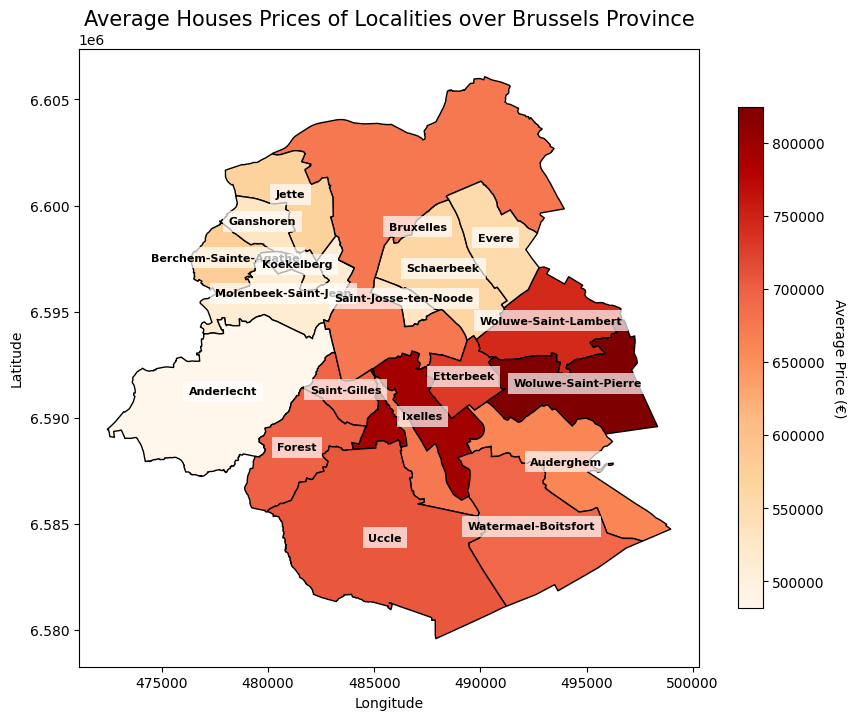

C:\Users\mgabi\AppData\Local\Temp\ipykernel_24672\3648228103.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Brussels_appar['Locality'] = Brussels_appar['Locality'].replace(locality_mapping)


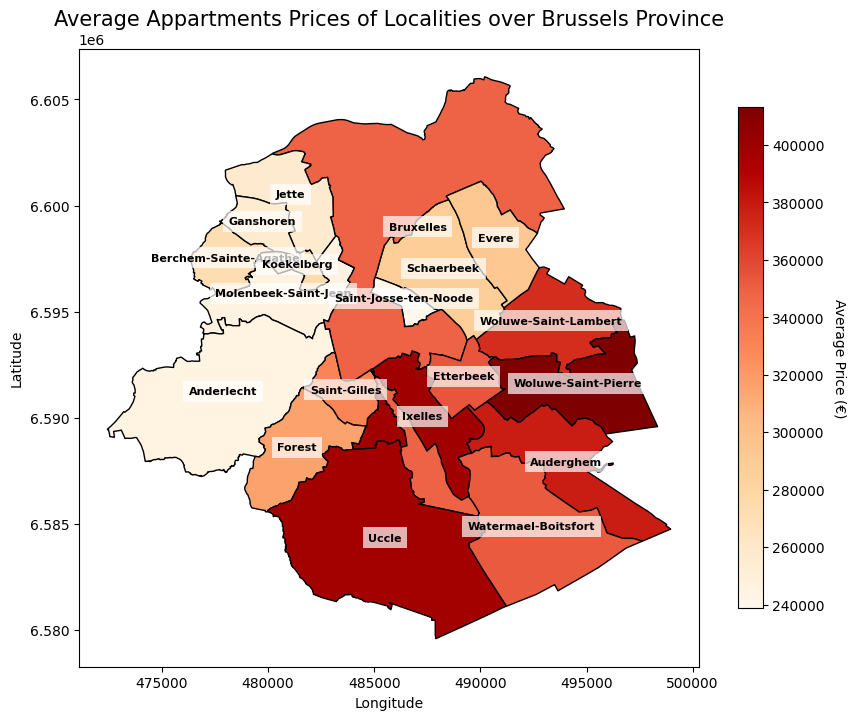

In [10]:
Brussels_house['Locality'] = Brussels_house['Locality'].replace(locality_mapping)
#### The below file is the main/targeted data to be displayed ####
avg_price_per_locality_houses = Brussels_house.groupby('Locality')['Price'].mean().reset_index() 
# this is the shape file for Brussels Municipalities, sheck the path of it.
file_path_l= r"Brussels_Municipalities\Brussels_-_Municipalities.shp"
Brussels_localities_map = gpd.read_file(file_path_l)
# merging the average prices based on the localities
merged_data_localities_houses = Brussels_localities_map.merge(avg_price_per_locality_houses, left_on='NAME_FRE', right_on='Locality')
#Plot the map with average prices
def ploting_prices_localities(data,colour_bar,fig_title, region_name): 
    fig, ax = plt.subplots(figsize=(10, 10))
    vmin = data['Price'].min()  
    vmax = data['Price'].max()  
    data.plot(column='Price', cmap=colour_bar, ax=ax, edgecolor='black',vmin=vmin, vmax=vmax, legend=False ) # legend=False as it will be set later. 

    # creating the customised colour bar
    sm = plt.cm.ScalarMappable(cmap=colour_bar, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm._A = [] # is a workaround to avoid an error that arises when the mappable object does not have any data associated with it.
    cbar = fig.colorbar(sm, ax=ax, shrink=0.65)
    cbar.ax.set_ylabel('Average Price (€)', rotation=270, labelpad=15)
    #cbar.ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))  # Change format as needed

    # Adding the locality names to the map
    for x, y, label in zip(data.geometry.centroid.x, 
                        data.geometry.centroid.y, 
                        data[region_name]):  # or the standardized name column
            ax.text(x, y, label, fontsize=8, ha='center', color='black', weight='bold', 
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
            plt.title(fig_title, fontsize=15)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()
ploting_prices_localities(data=merged_data_localities_houses,colour_bar="OrRd", fig_title="Average Houses Prices of Localities over Brussels Province",region_name='NAME_FRE')
############################################# Brussels_appartment ######################### 
Brussels_appar['Locality'] = Brussels_appar['Locality'].replace(locality_mapping)
avg_price_per_locality_appar = Brussels_appar.groupby('Locality')['Price'].mean().reset_index()
merged_data_Localities_appartments = Brussels_localities_map.merge(avg_price_per_locality_appar, left_on='NAME_FRE', right_on='Locality')

ploting_prices_localities( data=merged_data_Localities_appartments, colour_bar="OrRd",fig_title="Average Appartments Prices of Localities over Brussels Province",region_name='NAME_FRE')

0           Antwerpen
1           Bruxelles
2      Vlaams Brabant
3      Brabant Wallon
4     West-Vlaanderen
5     Oost-Vlaanderen
6             Hainaut
7               Liège
8             Limburg
9          Luxembourg
10              Namur
Name: NAME_2, dtype: object


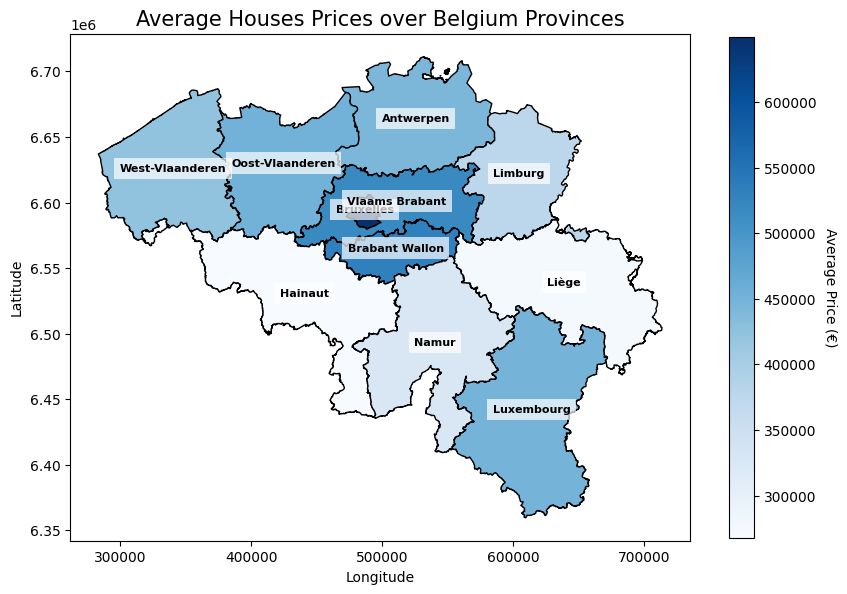

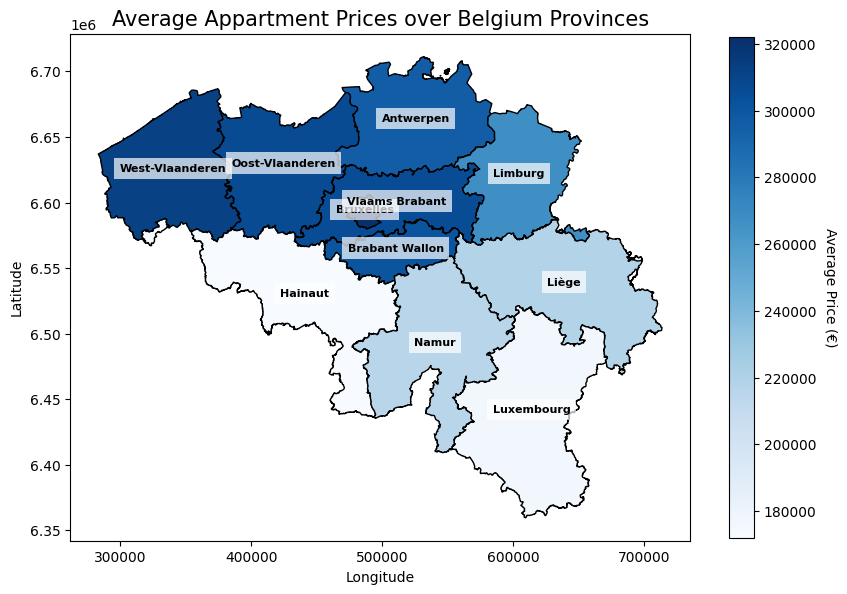

In [ ]:
# Load the shapefile and CSV data
# this is the shape file for Brussels Provinces, sheck the path of it.
file_path_p = r"BELGIUM_Provinces\BELGIUM_-_Provinces.shp"
Belgium_Province = gpd.read_file(file_path_p)
data = pd.read_csv(r"Results\Data_after_outliers_removal\Houses_and_Apartments_combined_without_outliers.csv")
# Standardize province names
provinces_mapping = {
    'Antwerp': 'Antwerpen',
    'Walloon Brabant': 'Brabant Wallon',
    'Brussels': 'Bruxelles',  
    'Flemish Brabant': 'Vlaams Brabant',
    'East Flanders':'Oost-Vlaanderen',
    'West Flanders':'West-Vlaanderen'
}
data['Province'] = data['Province'].replace(provinces_mapping)
proviencies_houses = data[data['PropertyType'] == 'HOUSE']
proviencies_apartment = data[data['PropertyType'] == 'APARTMENT']
avg_price_per_prov_houses = proviencies_houses.groupby('Province')['Price'].mean().reset_index()
avg_price_per_prov_appartment = proviencies_apartment.groupby('Province')['Price'].mean().reset_index()
merged_data_prov_houses = Belgium_Province.merge(avg_price_per_prov_houses, left_on='NAME_2', right_on='Province')
merged_data_prov_appartment = Belgium_Province.merge(avg_price_per_prov_appartment, left_on='NAME_2', right_on='Province')

ploting_prices_localities(data=merged_data_prov_houses, colour_bar="Blues", fig_title='Average Houses Prices over Belgium Provinces', region_name='NAME_2')
ploting_prices_localities(data=merged_data_prov_appartment, colour_bar="Blues", fig_title='Average Appartment Prices over Belgium Provinces', region_name='NAME_2')